<a href="https://colab.research.google.com/github/wei666-myst/crypto-btc-and-vix-corr/blob/main/%5BCryptofin%5DHello_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 如何了解資產之間的關聯
- 相關係數
- 計量分析

## 相關係數
- 下載資料
- 計算報酬率
- 計算相關係數

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm

In [3]:
# 下載資料(BTC)
data = yf.download('BTC-USD',start='2020-01-01')
data_1 = yf.download('^VIX',start='2020-01-01')

/tmp/ipython-input-3035454337.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('BTC-USD',start='2020-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3035454337.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_1 = yf.download('^VIX',start='2020-01-01')
[*********************100%***********************]  1 of 1 completed


In [4]:
## 相關係數 (BTC, ETH)
data = data[['Close']]
data.columns = ['price_btc']
data_1 = data_1[['Close']]
data_1.columns = ['price_^VIX']

In [5]:
data_1.head()

,price_^VIX
Date,
2020-01-02,12.47
2020-01-03,14.02
2020-01-06,13.85
2020-01-07,13.79
2020-01-08,13.45


In [7]:
# 合併資料(當index相同下)
data_m = data.join(data_1)

In [8]:
data_m

,price_btc,price_^VIX
Date,,
2020-01-01,7200.174316,NaN
2020-01-02,6985.470215,12.47
2020-01-03,7344.884277,14.02
2020-01-04,7410.656738,NaN
2020-01-05,7411.317383,NaN
...,...,...
2025-12-01,86321.570312,17.24
2025-12-02,91350.203125,16.59
2025-12-03,93527.804688,16.08


In [9]:
# 建立各自報酬率
data_m['ret_btc'] = data_m.price_btc.pct_change()
data_m['ret_vix'] = data_m['price_^VIX'].pct_change()

/tmp/ipython-input-2990787043.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data_m['ret_vix'] = data_m['price_^VIX'].pct_change()


In [10]:
# 計算相關係數
# 針對報酬率來作為變數，而不是用價格
corr_btc_vix = data_m.ret_btc.corr(data_m.ret_vix)
print('BTC與vix之相關係數為{:.4f}'.format(corr_btc_vix))

BTC與vix之相關係數為-0.3219


In [11]:
# 建立每個月的相關係數 (運用resample的方式)
corr_btc_vix_month = data_m.resample('ME').apply(lambda x: x['ret_btc'].corr(x['ret_vix']))
print(corr_btc_vix_month)

Date
2020-01-31    0.046210
2020-02-29   -0.125700
2020-03-31   -0.604314
2020-04-30   -0.427698
2020-05-31    0.048476
                ...   
2025-08-31   -0.568511
2025-09-30    0.055441
2025-10-31   -0.545164
2025-11-30   -0.429076
2025-12-31   -0.859275
Freq: ME, Length: 72, dtype: float64


<Axes: xlabel='Date'>

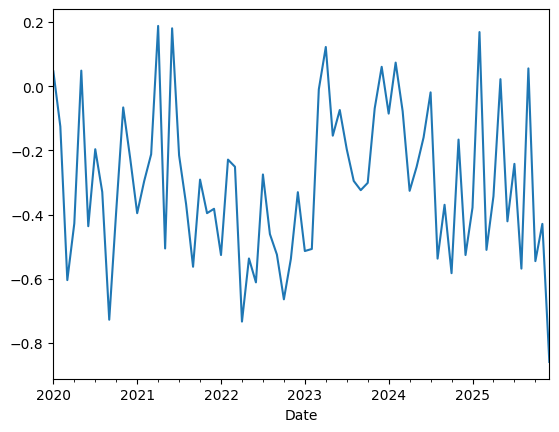

In [12]:
corr_btc_vix_month.plot()


In [13]:
# 將結果匯出成csv (可用excel開啟)
corr_btc_vix_month.to_csv('corr_month.csv')


In [14]:
# 將整理好資料 上傳至colab
data_final = pd.read_csv('corr_month.csv')
data_final.index = pd.to_datetime(data_final.Date)
data_final.drop('Date',axis=1,inplace=True)
data_final.columns = ['corr_btc_vix'] # 修正欄位名稱，使其符合實際內容和欄位數量
data_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2020-01-31 to 2025-12-31
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   corr_btc_vix  72 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


## 計量分析
- 下載資料
- 合併資料
- 跑簡單線性回歸 (計量分析)
$$
y_t = \alpha + \beta_1 x_t + \epsilon_t
$$
或者是預測模型
$$
y_t = \alpha + \beta_1 x_{t-1} + \epsilon_t
$$

### 範例: 加密貨幣與美股之間的關係
- 下載資料: BTC和S&P500

In [ ]:
# 下載資料(BTC, S&P500)
data = yf.download('BTC-USD',start='2020-01-01')
data_1 = yf.download('^gspc',start='2020-01-01')
## 整理資料 (BTC, S&P500)
data = data[['Close']]
data.columns = ['price_btc']
data_1 = data_1[['Close']]
data_1.columns = ['price_sp500']

/tmp/ipython-input-328365642.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('BTC-USD',start='2020-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-328365642.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_1 = yf.download('^gspc',start='2020-01-01')
[*********************100%***********************]  1 of 1 completed


In [ ]:
# 合併資料(當index相同下)
data_m = data_1.join(data)
data_m.head()

,price_sp500,price_btc
Date,,
2020-01-02,3257.850098,6985.470215
2020-01-03,3234.850098,7344.884277
2020-01-06,3246.280029,7769.219238
2020-01-07,3237.179932,8163.692383
2020-01-08,3253.050049,8079.862793


In [ ]:
# 建立各自報酬率
data_m['ret_btc'] = data_m.price_btc.pct_change()
data_m['ret_sp500'] = data_m.price_sp500.pct_change()
data_m.head()

/tmp/ipython-input-2030919949.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data_m['ret_btc'] = data_m.price_btc.pct_change()


,price_sp500,price_btc,ret_btc,ret_sp500
Date,,,,
2020-01-02,3257.850098,6985.470215,NaN,NaN
2020-01-03,3234.850098,7344.884277,0.051452,-0.007060
2020-01-06,3246.280029,7769.219238,0.057773,0.003533
2020-01-07,3237.179932,8163.692383,0.050774,-0.002803
2020-01-08,3253.050049,8079.862793,-0.010269,0.004902


In [ ]:
data_m['ret_sp500_1'] = data_m.ret_sp500.shift()

In [ ]:
# 計算相關係數
a = data_m.ret_btc.corr(data_m.ret_sp500)
print('BTC與S&P500的相關係數是{:.4f}'.format(a))

BTC與S&P500的相關係數是0.3749


In [ ]:
# S&P500日報酬對BTC日報酬之影響
y = data_m.ret_btc
x = sm.add_constant(data_m.ret_sp500)
res = sm.OLS(y,x,missing='drop').fit()
print(res.summary())
#p-value<0.01 (***) <0.05 (**) <0.1 (*)

                            OLS Regression Results                            
Dep. Variable:                ret_btc   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     240.6
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           2.23e-50
Time:                        03:29:51   Log-Likelihood:                 2804.5
No. Observations:                1473   AIC:                            -5605.
Df Residuals:                    1471   BIC:                            -5594.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.001      2.091      0.0

### 範例: BTC報酬是否受到美國EPU的影響

In [ ]:
#下載資料
data = yf.download('BTC-USD')
data = data['2018':]
data = data[['Adj Close','Volume']]

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# 整理資料
data.columns = ['price_btc','tv_btc'] #tv: trading volume
# 生成報酬率/變化率
data['ret_btc'] = np.log(data.price_btc).diff()
data['ret_tv'] = np.log(data.tv_btc).diff()

In [ ]:
# 更改頻率至月頻率
data_m = data.resample('M').sum()
data_m['price_btc'] = data['price_btc'].resample('M').last()
data_m.head()

,price_btc,tv_btc,ret_btc,ret_tv
Date,,,,
2018-01-31,10221.099609,416247858176,-0.289813,-0.246716
2018-02-28,10397.900391,229717780480,0.017150,-0.147821
2018-03-31,6973.529785,193751709184,-0.399482,-0.420907
2018-04-30,9240.549805,196550010624,0.281480,0.644475
2018-05-31,7494.169922,197611709696,-0.209476,-0.525775


In [ ]:
# 匯出csv檔案
data_m.to_csv('BTCprice.csv')

In [ ]:
# 匯入整理後資料
data_all = pd.read_csv('/content/all_data.csv')
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       69 non-null     object 
 1   price_btc  69 non-null     float64
 2   tv_btc     69 non-null     float64
 3   ret_btc    69 non-null     float64
 4   ret_tv     69 non-null     float64
 5   epu_us     69 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.4+ KB


In [ ]:
data_all.index = pd.to_datetime(data_all.Date)
data_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69 entries, 2018-01-31 to 2023-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       69 non-null     object 
 1   price_btc  69 non-null     float64
 2   tv_btc     69 non-null     float64
 3   ret_btc    69 non-null     float64
 4   ret_tv     69 non-null     float64
 5   epu_us     69 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.8+ KB


In [ ]:
# 建立EPU變化率
data_all['ret_epu'] = data_all.epu_us.pct_change()
data_all['ret_epu_1'] = data_all.epu_us.pct_change().shift()

In [ ]:
# 相關係數
data_all.ret_btc.corr(data_all.ret_epu)
# 2020年的相關係數
data_all['2023'].ret_btc.corr(data_all['2023'].ret_epu_1)

<ipython-input-72-591678dd9a42>:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_all['2023'].ret_btc.corr(data_all['2023'].ret_epu_1)


-0.003805007246456761

In [ ]:
# 回歸分析
y = data_all.ret_btc
x = sm.add_constant(data_all.ret_epu_1)
res = sm.OLS(y,x,missing='drop').fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                ret_btc   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                  0.006405
Date:                Wed, 08 Nov 2023   Prob (F-statistic):              0.936
Time:                        06:09:44   Log-Likelihood:                 10.531
No. Observations:                  67   AIC:                            -17.06
Df Residuals:                      65   BIC:                            -12.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0144      0.026      0.560      0.5

In [ ]:
# 對變數進行回歸分析 (模型1)
data_final['ret_epu'] = data_final.epu.pct_change()

In [ ]:
# 對變數進行回歸分析 (模型1)
# y: 相關係數 x: EPU的變化率
y = data_final.corr_btc_eth
x = sm.add_constant(data_final.ret_epu)
res = sm.OLS(y,x,missing='drop').fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           corr_btc_eth   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                  0.003416
Date:                Thu, 02 Nov 2023   Prob (F-statistic):              0.954
Time:                        03:08:13   Log-Likelihood:                 53.369
No. Observations:                  59   AIC:                            -102.7
Df Residuals:                      57   BIC:                            -98.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8423      0.013     64.320      0.0

In [ ]:
# 對變數進行回歸分析 (模型2)
# y: 相關係數 x: EPU的變化率
y = data_final.corr_btc_eth
x = sm.add_constant(data_final.ret_epu.shift())
res = sm.OLS(y,x,missing='drop').fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           corr_btc_eth   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.927
Date:                Thu, 02 Nov 2023   Prob (F-statistic):             0.0926
Time:                        03:11:04   Log-Likelihood:                 53.628
No. Observations:                  58   AIC:                            -103.3
Df Residuals:                      56   BIC:                            -99.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8377      0.013     64.508      0.0

# 量化投資策略
- 獲取歷史資料
- 設定進場出場條件 (投資策略)
- 計算報酬與績效

In [ ]:
# import package
import numpy as np
import pandas as pd
import yfinance as yf

In [ ]:
# 以BTC為例
data = yf.download('BTC-USD')
data = data['2018':]
data = data[['Close']]
data.columns = ['price_btc']
data.info()

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2132 entries, 2018-01-01 to 2023-11-02
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price_btc  2132 non-null   float64
dtypes: float64(1)
memory usage: 33.3 KB


In [ ]:
# 利用移動平均建立投資策略
# 建立移動平均線
data['ma5'] = data.price_btc.rolling(5).mean()
# 建立多空訊號 (注意時間順序)
data['ma5_rule'] = (data.ma5<data.price_btc).shift()
data.ma5_rule = data.ma5_rule.replace({True:1,False:0})
# 建立累積報酬率 (績效)
data['ret_btc'] = np.log(data.price_btc).diff()
data['ma5_cumret'] = (data.ret_btc*data.ma5_rule).cumsum()
# 建立基準績效 (buy-and-hold)
data['bh_cumret'] = data.ret_btc.cumsum()
data.head()

,price_btc,ma5,ma5_rule,ret_btc,ma5_cumret,bh_ret,bh_cumret
Date,,,,,,,
2018-01-01,13657.200195,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,14982.099609,NaN,0.0,0.092589,0.0,0.092589,0.092589
2018-01-03,15201.000000,NaN,0.0,0.014505,0.0,0.107094,0.107094
2018-01-04,15599.200195,NaN,0.0,0.025858,0.0,0.132953,0.132953
2018-01-05,17429.500000,15373.8,0.0,0.110945,0.0,0.243897,0.243897


<Axes: xlabel='Date'>

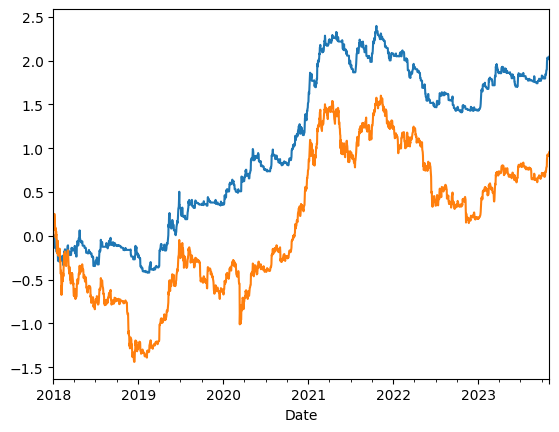

In [ ]:
# 比較累積報酬率 (策略vs基準)
data.cum_ret.plot()
data.bh_ret.plot()

In [ ]:
# 以BTC為例
data = yf.download('BTC-USD')
data = data['2018':]
data = data[['Close']]
data.columns = ['price_btc']
data.info()

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2132 entries, 2018-01-01 to 2023-11-02
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price_btc  2132 non-null   float64
dtypes: float64(1)
memory usage: 33.3 KB


In [ ]:
# 利用動能策略建立投資策略
# 計算日報酬
data['ret_btc'] = np.log(data.price_btc).diff()
# 計算過去5日報酬
data['mom5'] = data.ret_btc.rolling(5).sum()
# 建立多空訊號 (注意時間順序)
data['mom5_rule'] = (data.mom5>0).shift()
data.mom5_rule = data.mom5_rule.replace({True:1,False:0})
# 建立累積報酬率 (績效)
data['mom5_cumret'] = (data.ret_btc*data.mom5_rule).cumsum()
# 建立基準績效 (buy-and-hold)
data['bh_cumret'] = data.ret_btc.cumsum()
data.head()

,price_btc,ma5,ma5_rule,ret_btc,ma5_cumret,bh_ret,bh_cumret,mom5,mom5_rule,mom5_cumret
Date,,,,,,,,,,
2018-01-01,13657.200195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,14982.099609,NaN,0.0,0.092589,0.0,0.092589,0.092589,NaN,0.0,0.0
2018-01-03,15201.000000,NaN,0.0,0.014505,0.0,0.107094,0.107094,NaN,0.0,0.0
2018-01-04,15599.200195,NaN,0.0,0.025858,0.0,0.132953,0.132953,NaN,0.0,0.0
2018-01-05,17429.500000,15373.8,0.0,0.110945,0.0,0.243897,0.243897,NaN,0.0,0.0


<Axes: xlabel='Date'>

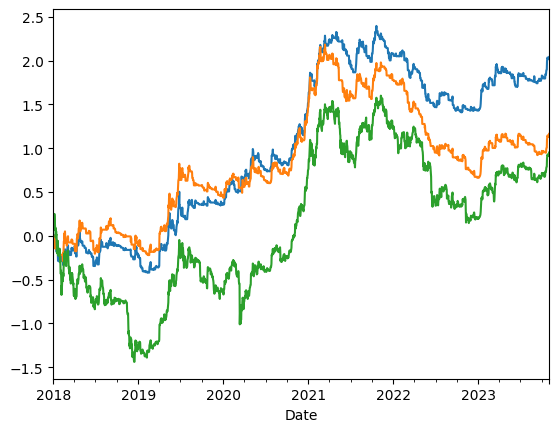

In [ ]:
# 比較累積報酬率 (策略vs基準)
data.ma5_cumret.plot()
data.mom5_cumret.plot()
data.bh_cumret.plot()
# 小結:
# 移動平均或動能策略都是看價格趨勢來操作 所以績效結果類似 但移動平均效果更好

In [ ]:
# 勝率
# ma5的勝率
win_ma5 = (data.ma5_rule == (data.ret_btc>0)).sum()/len(data.ma5_rule)
# mom5的勝率
win_mom5 = (data.mom5_rule == (data.ret_btc>0)).sum()/len(data.ma5_rule)
# buy-and-hold的勝率
win_bh = (data.ret_btc>0).sum()/len(data.ma5_rule)
print('ma5的勝率: {:.4f}'.format(win_ma5))
print('mom5的勝率: {:.4f}'.format(win_mom5))
print('bh的勝率: {:.4f}'.format(win_bh))

ma5的勝率: 0.4869
mom5的勝率: 0.4761
bh的勝率: 0.5108


## 獲取歷史資料
- yfinance套件

## 投資策略
- 移動平均
- 動能策略

## 計算報酬與績效
- 設定基準報酬率
- 累積報酬率
- 期間波動率
- 勝率
